In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
import statsmodels.api  as sm
import statsmodels.formula.api as smf

#Importojm te dhenat
players = pd.read_csv('player_stats.csv')
matches = pd.read_csv('odds_study.csv')
goals = pd.read_csv('home_vs_away.csv')

# Sa e parashikueshme është Superliga

In [64]:
matches1 = matches.drop(matches.columns[[5,6]], axis=1)
matches1.rename(columns={'year':'Sezoni'}, inplace=True)
matches1

,home_team,away_team,1,x,2,Sezoni
0,Kukësi,Partizani,2.24,3.05,3.68,2019-2020
1,Tirana,Luftëtari,2.05,3.91,6.52,2019-2020
2,Teuta,Bylis,1.87,3.40,5.15,2019-2020
3,Tirana,Teuta,2.21,3.10,3.60,2019-2020
4,Laçi,Skënderbeu,2.06,3.58,3.30,2019-2020
...,...,...,...,...,...,...
636,Bylis,Tomori,1.11,5.20,9.50,2012-2013
637,Luftëtari,Laçi,4.00,3.50,1.30,2012-2013
638,Skënderbeu,Kastrioti,1.38,4.00,4.25,2012-2013
639,Teuta,Laçi,1.28,4.00,5.80,2012-2013


In [65]:
from scipy.stats import entropy



def match_entropy(row):

    koeficent = [row['1'],row['x'],row['2']]

    #kthejme koeficentet ne probabilitet

    prob = [1/o for o in koeficent]

    #normalizojme shumen ne 1

    norm = sum(prob)

    prob = [p/norm for p in prob]

    return entropy(prob)



#Gjejm entropine e nje ndeshjeje te caktuar

matches1['Parashikueshmeria'] = matches1.apply(match_entropy,axis=1)
print (matches1.head())

  home_team   away_team     1     x     2     Sezoni  Parashikueshmeria
0    Kukësi   Partizani  2.24  3.05  3.68  2019-2020           1.077196
1    Tirana   Luftëtari  2.05  3.91  6.52  2019-2020           0.991034
2     Teuta       Bylis  1.87  3.40  5.15  2019-2020           1.012879
3    Tirana       Teuta  2.21  3.10  3.60  2019-2020           1.076911
4      Laçi  Skënderbeu  2.06  3.58  3.30  2019-2020           1.066602


In [66]:
entropy_means1 = matches1.groupby(['Sezoni'], as_index=True).Parashikueshmeria.mean()
print (entropy_means1)

Sezoni
2012-2013    0.985796
2013-2014    1.009444
2014-2015    0.966194
2015-2016    0.920314
2016-2017    1.000383
2017-2018    1.008532
2018-2019    1.019817
2019-2020    0.991287
Name: Parashikueshmeria, dtype: float64


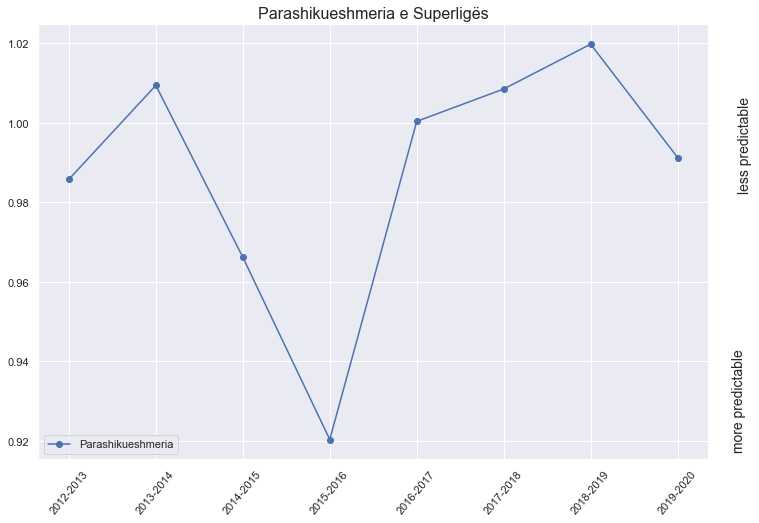

In [67]:
#Ndertojme grafikun
ax = entropy_means1.plot(figsize=(12,8),marker='o')

#Titulli
plt.title('Parashikueshmeria e Superligës', fontsize=16)

plt.xticks(rotation=50)

ax.set_xlabel('')

#Vendosja e legjendes
plt.legend(loc='lower left')

#Shtojme shigjetat
ax.annotate('', xytext=(7.55, 0.98),xy=(7.55, 1.025),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.55, 0.96),xy=(7.55, 0.915),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.7, 0.983), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('more predictable', xy=(7.63, 0.918), annotation_clip=False,fontsize=14,rotation='vertical')

plt.show()

## Fig. 1.1 Parashikueshmëria e Superligës

In [68]:
team_entropy = []
ekipet = ['Teuta', 'Partizani', 'Kukësi', 'Laçi', 'Flamurtari', 'Skënderbeu', 
         'Tirana', 'Vllaznia', 'Luftëtari', 'Bylis', 'Kastrioti']

for teams in ekipet:
    for Sezoni in entropy_means.iloc[:,0]:  
        entropia = matches1.loc[(matches1['home_team'] == teams) | (matches1['away_team'] == teams) & (matches1['Sezoni'] == Sezoni), 'Parashikueshmeria'].mean()
        team_entropy.append(pd.Series({
            "Ekipi": teams,
            "Sezoni": Sezoni,
            "Parashikueshmeria":entropia
        }))
df = pd.DataFrame(data=team_entropy)
df = df.sort_values(by='Sezoni', ascending = True)
df

,Ekipi,Sezoni,Parashikueshmeria
0,Teuta,2012-2013,1.019746
32,Flamurtari,2012-2013,1.008074
48,Tirana,2012-2013,0.985794
56,Vllaznia,2012-2013,1.035698
24,Laçi,2012-2013,0.975262
...,...,...,...
55,Tirana,2019-2020,0.982587
31,Laçi,2019-2020,0.984806
47,Skënderbeu,2019-2020,0.913544
7,Teuta,2019-2020,1.020827


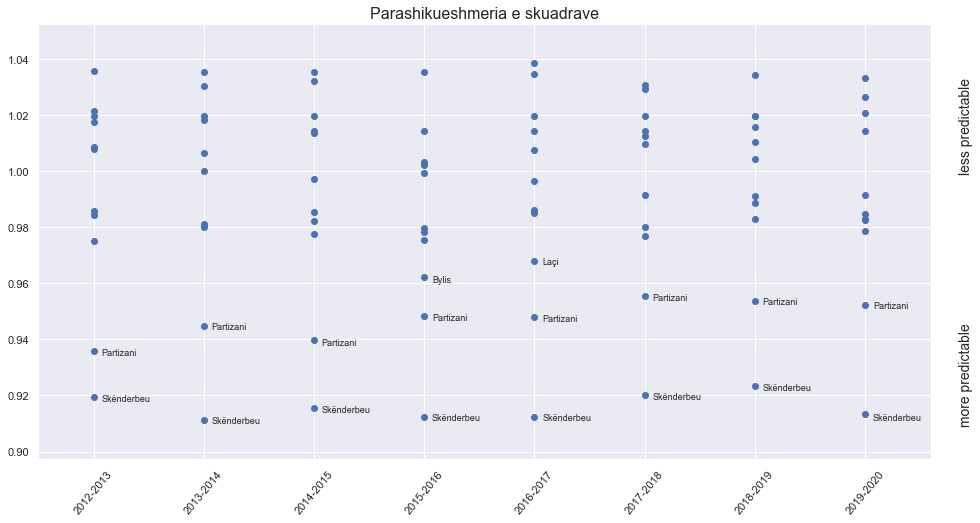

In [69]:
plt.figure(figsize=(16,8))
x = df['Sezoni']
y = df['Parashikueshmeria']
plt.scatter(x,y)
plt.title('Parashikueshmeria e skuadrave', fontsize=16)

ax = plt.gca()
plt.xlim((-0.5,7.6))
plt.xticks(np.arange(0,8,1),rotation=50)


ax.annotate('', xytext=(7.75, 0.99),xy=(7.75, 1.052),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.75, 0.962),xy=(7.75, 0.9),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.85, 1), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('more predictable', xy=(7.85, 0.91), annotation_clip=False,fontsize=14,rotation='vertical')

ax.annotate('Skënderbeu', xy=(0.07, 0.918),fontsize=9)
ax.annotate('Skënderbeu', xy=(1.07, 0.91),fontsize=9)
ax.annotate('Skënderbeu', xy=(2.07, 0.914),fontsize=9)
ax.annotate('Skënderbeu', xy=(3.07, 0.911),fontsize=9)
ax.annotate('Skënderbeu', xy=(4.07, 0.9112),fontsize=9)
ax.annotate('Skënderbeu', xy=(5.07, 0.9185),fontsize=9)
ax.annotate('Skënderbeu', xy=(6.07, 0.922),fontsize=9)
ax.annotate('Skënderbeu', xy=(7.07, 0.9112),fontsize=9)

ax.annotate('Partizani', xy=(0.07, 0.9345),fontsize=9)
ax.annotate('Partizani', xy=(1.07, 0.9435),fontsize=9)
ax.annotate('Partizani', xy=(2.07, 0.938),fontsize=9)
ax.annotate('Partizani', xy=(3.07, 0.947),fontsize=9)
ax.annotate('Partizani', xy=(4.07, 0.9465),fontsize=9)
ax.annotate('Partizani', xy=(5.07, 0.954),fontsize=9)
ax.annotate('Partizani', xy=(6.07, 0.9525),fontsize=9)
ax.annotate('Partizani', xy=(7.07, 0.951),fontsize=9)

ax.annotate('Bylis', xy=(3.07, 0.9605),fontsize=9)
ax.annotate('Laçi', xy=(4.07, 0.967),fontsize=9)

plt.show()

## Fig. 1.2 Parashikueshmëria e Skuadrave

In [70]:
goals1 = goals.drop(goals.columns[[6]], axis=1)
goals1

,home_team,ft_home,ft_away,away_team,ht_home,ht_away
0,Skënderbeu,2,1,Kukësi,2.0,1.0
1,Vllaznia,1,0,Partizani,1.0,0.0
2,Tirana,1,0,Laci,0.0,0.0
3,Luftëtari,1,1,Bylis,1.0,1.0
4,Teuta,1,1,Flamurtari,0.0,1.0
...,...,...,...,...,...,...
1131,Laçi,1,0,Teuta,1.0,0.0
1132,Luftëtari,0,1,Skënderbeu,0.0,1.0
1133,Bylis,1,0,Tirana,0.0,0.0
1134,Kukësi,3,1,Kastrioti,2.0,0.0


## Te dhena per lojtaret

In [71]:
#leximi i data
df = pd.read_csv('player_stats.csv')
df.rename(columns={'Minutes played':'Minutes_played'}, inplace=True)
df.rename(columns={'Yellow card':'Yellow_card'}, inplace=True)

#heq ato rreshta ku nuk kan luajtur lojtar
df = df[df['Minutes_played'] != 0]

#grupimi i te dhenave nga mosha
daf2 = df.groupby(['Age']).agg(sum)
#daf2 = df.groupby(['Name', 'Age']).agg(sum)

daf2

,Minutes_played,Appearances,Lineups,Substitute in,Substitute out,Substitutes on bench,Goal,Yellow_card,Yellow 2nd/RC,Red card
Age,,,,,,,,,,
16.0,180,2,2,0,0,0,0,1,0,0
17.0,1,1,1,0,0,2,0,0,0,0
18.0,3948,76,42,34,26,127,0,7,0,0
19.0,17113,295,182,113,53,296,9,41,0,0
20.0,15481,298,160,138,70,496,9,39,0,1
21.0,53244,959,561,398,223,963,58,119,0,2
22.0,84957,1306,919,387,260,1091,86,136,0,2
23.0,93106,1458,1015,443,314,999,90,187,4,3
24.0,129910,1850,1446,404,381,941,157,356,9,5


In [72]:
#ndaj te dhenat sipas lojtareve
daf = df.groupby(['Name']).agg('sum')
daf = daf.drop(df.columns[[2, 5, 6, 7, 8, 9]], axis=1)
daf

,Minutes_played,Goal,Yellow_card,Yellow 2nd/RC,Red card
Name,,,,,
A. Abdel Rahim,251,0,0,0,0
A. Abibi,2070,0,1,0,0
A. Abilaliaj,5468,24,16,0,0
A. Adelaja,206,0,0,0,0
A. Adigun,1144,2,0,0,0
...,...,...,...,...,...
Ángel Orué,18,0,0,0,0
Índio Oliveira,389,0,1,0,0
Ð. Ðikanovic,241,0,0,0,0


## Te dhëna nga statistika pershkruese

In [73]:
daf.describe()

,Minutes_played,Goal,Yellow_card,Yellow 2nd/RC,Red card
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,2333.196226,2.623585,5.332075,0.159434,0.148113
std,3453.236595,6.556561,8.786262,0.514250,0.461703
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,215.500000,0.000000,0.000000,0.000000,0.000000
50%,941.500000,0.000000,2.000000,0.000000,0.000000
75%,2631.500000,2.000000,6.000000,0.000000,0.000000
max,22108.000000,91.000000,79.000000,5.000000,4.000000


## Lidhja midis kohës së luajtur dhe golave

In [74]:
from scipy import stats

#y variabli i varur
#x variabli i pavarur

x = daf['Minutes_played']
y = daf['Goal']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Koeficienti i këndit: ', slope,'\nTermi i lirë: ', intercept,'\nKoeficienti i korrelacionit: ', r_value,'\nVlera e p për tëst hipoteze ku hipoteza 0 thotë se këndi është 0: ', p_value)

Koeficienti i këndit:  0.0010448284967585822 
Termi i lirë:  0.18579499977229785 
Koeficienti i korrelacionit:  0.5502945997834925 
Vlera e p për tëst hipoteze ku hipoteza 0 thotë se këndi është 0:  5.972517395564619e-85


[Text(0, 0.5, 'Golat'),
 Text(0.5, 0, 'Koha e Luajtur'),
 Text(0.5, 1.0, 'Lidhja midis minutave te luajtara dhe golave')]

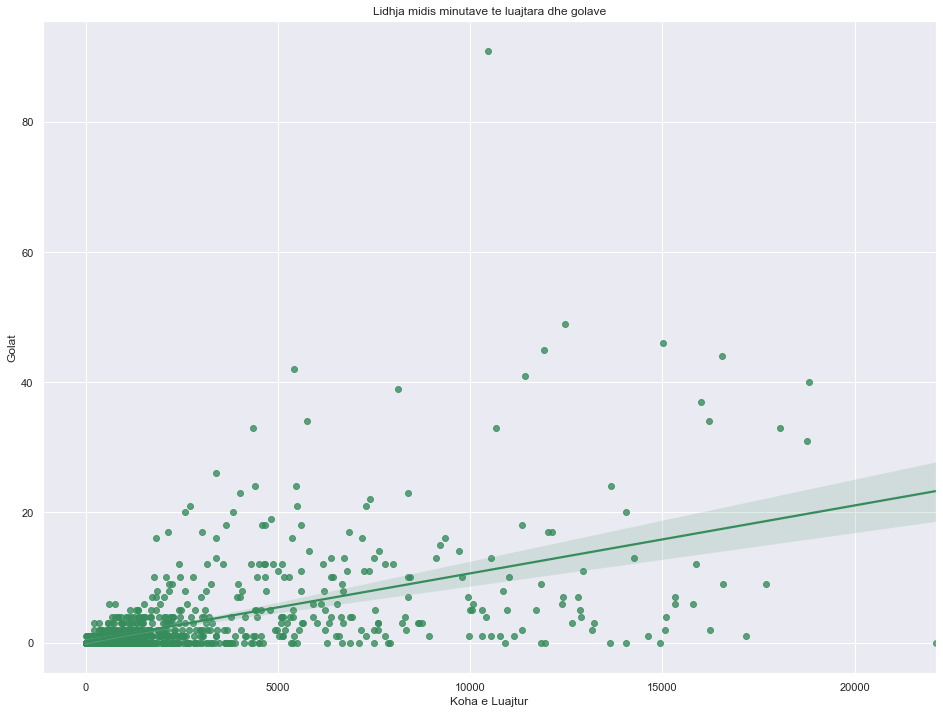

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)

ax = sns.regplot(x="Minutes_played", y="Goal", data=daf, color='#378c5c')
sns.set(style='darkgrid', font='Arial')
ax.set(xlabel='Koha e Luajtur', ylabel='Golat', title='Lidhja midis minutave te luajtara dhe golave')

## Fig. 2.1.1 Lidhja midis minutave të luajtura dhe golave

[Text(0, 0.5, 'Mbetjet e golave'), Text(0.5, 0, 'Koha e Luajtur')]

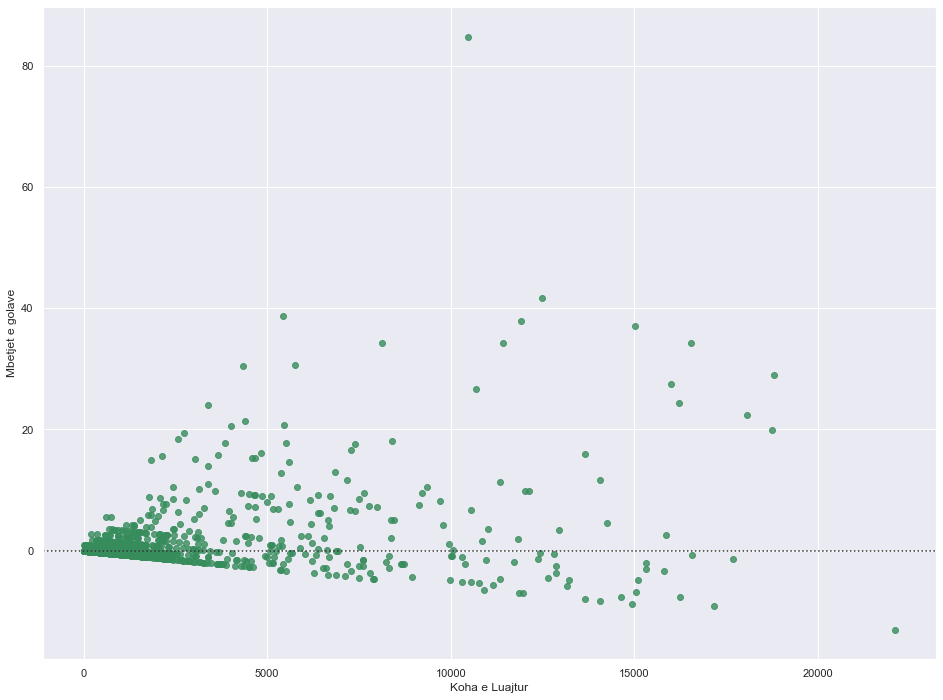

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)

goal = sns.residplot(x="Minutes_played", y="Goal", data=daf, color='#378c5c', robust=True)
goal.set(xlabel='Koha e Luajtur', ylabel='Mbetjet e golave')

## Fig. 2.1.2 Lidhja midis minutave të luajtura dhe golave

Nga grafiku i mbetjeve del që varianca rritet me rritjen e kohes, kështu që regresi linear me metodën e OLS nuk është e duhura. Përdor modelin Quantile Regression.

## Modeli Quantile Regression per lidhjen midis kohes dhe golave

In [77]:
mod = smf.quantreg('Goal ~ Minutes_played', daf)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                   Goal   Pseudo R-squared:               0.1554
Model:                       QuantReg   Bandwidth:                      0.4660
Method:                 Least Squares   Sparsity:                        1.562
Date:                Tue, 10 Nov 2020   No. Observations:                 1060
Time:                        08:49:25   Df Residuals:                     1058
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0511      0.029     -1.764      0.078      -0.108       0.006
Minutes_played     0.0006   6.95e-06     81.662      0.000       0.001       0.001

The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other nume

In [78]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Minutes_played']] + \
            res.conf_int().loc['Minutes_played'].tolist()

#q-quartile, lb-lower bound, up-upper bound
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Goal ~ Minutes_played', daf).fit()
ols_ci = ols.conf_int().loc['Minutes_played'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Minutes_played'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q             a             b        lb        ub
0  0.05 -3.088261e-07  3.248541e-10 -0.000008  0.000008
1  0.15 -2.058605e-06  2.913937e-09 -0.000008  0.000008
2  0.25 -5.530442e-02  1.265582e-04  0.000116  0.000137
3  0.35 -8.291207e-02  3.528167e-04  0.000340  0.000365
4  0.45 -7.262495e-02  4.940551e-04  0.000481  0.000507
5  0.55 -5.912769e-02  7.390965e-04  0.000724  0.000754
6  0.65 -4.592518e-02  1.148106e-03  0.001132  0.001165
7  0.75 -3.586837e-02  1.630439e-03  0.001610  0.001651
8  0.85 -9.136559e-03  2.284017e-03  0.002261  0.002307
9  0.95  4.812023e-01  3.759399e-03  0.003732  0.003786
{'a': 0.1857949997722981, 'b': 0.001044828496758582, 'lb': 0.0009491920798708631, 'ub': 0.0011404649136463009}


Text(0, 0.5, 'Golat')

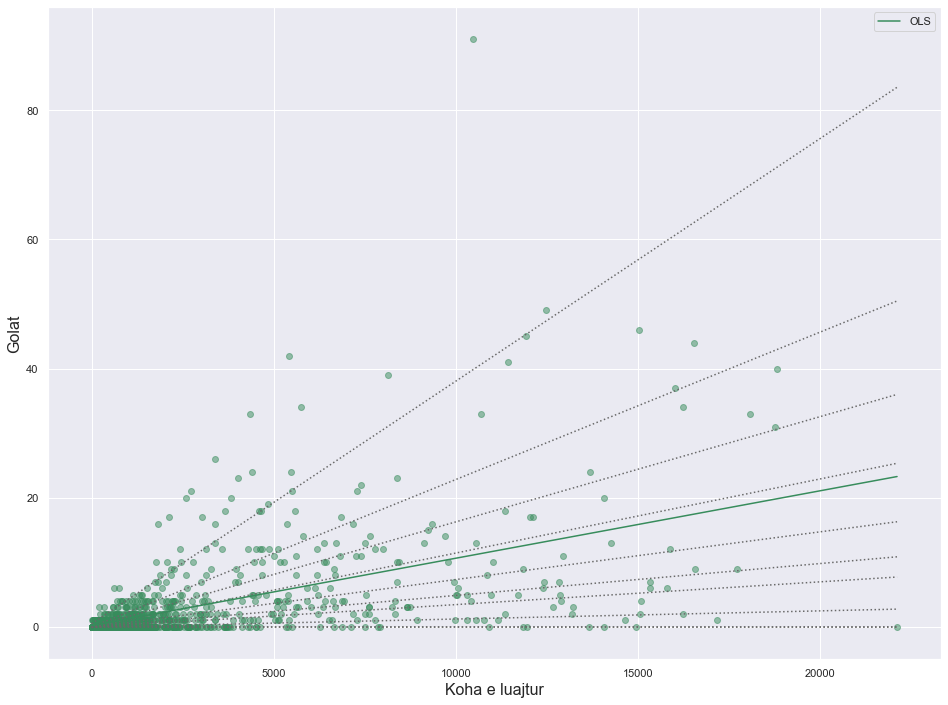

In [79]:
x = np.arange(daf.Minutes_played.min(), daf.Minutes_played.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(16, 12))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='#696969')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='#378c5c', label='OLS')
ax.scatter(daf.Minutes_played, daf.Goal, alpha=.5, color='#378c5c')

legend = ax.legend()
ax.set_xlabel('Koha e luajtur', fontsize=16)
ax.set_ylabel('Golat', fontsize=16)

## Fig. 2.1.3 Lidhja midis minutave të luajtura dhe golave, bashkë me vijat e kuantileve

In [80]:
x = daf['Minutes_played']
y = daf['Yellow_card']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Koeficienti i këndit: ', slope,'\nTermi i lirë: ', intercept,'\nKoeficienti i korrelacionit: ', r_value,'\nVlera e p për tëst hipoteze ku hipoteza 0 thotë se këndi është 0: ', p_value)

Koeficienti i këndit:  0.0021562105362934636 
Termi i lirë:  0.3012131850617372 
Koeficienti i korrelacionit:  0.8474485454788396 
Vlera e p për tëst hipoteze ku hipoteza 0 thotë se këndi është 0:  3.2014386049513084e-293


[Text(0, 0.5, 'Kartona të verdhë'),
 Text(0.5, 0, 'Koha e Luajtur'),
 Text(0.5, 1.0, 'Lidhja midis minutave të luajtara dhe kartonave të verdhë')]

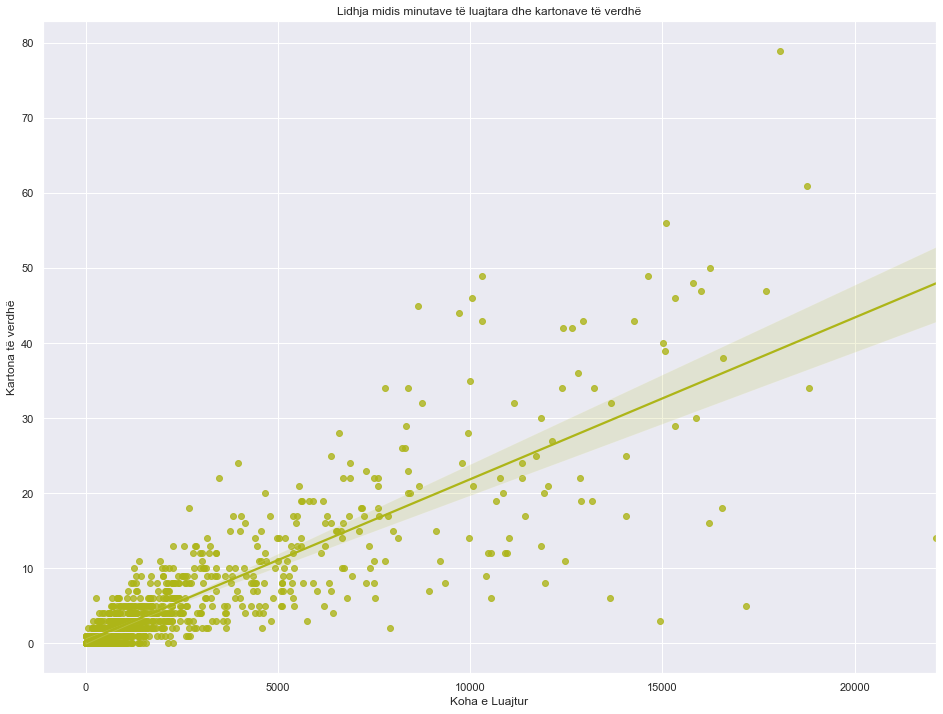

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)

ax = sns.regplot(x="Minutes_played", y="Yellow_card", data=daf, color='#adb518')
sns.set(style='darkgrid', font='Arial')
ax.set(xlabel='Koha e Luajtur', ylabel='Kartona të verdhë', title='Lidhja midis minutave të luajtara dhe kartonave të verdhë')

## Fig. 2.2.1 Lidhja midis minutave të luajtura dhe kartonave të verdhë

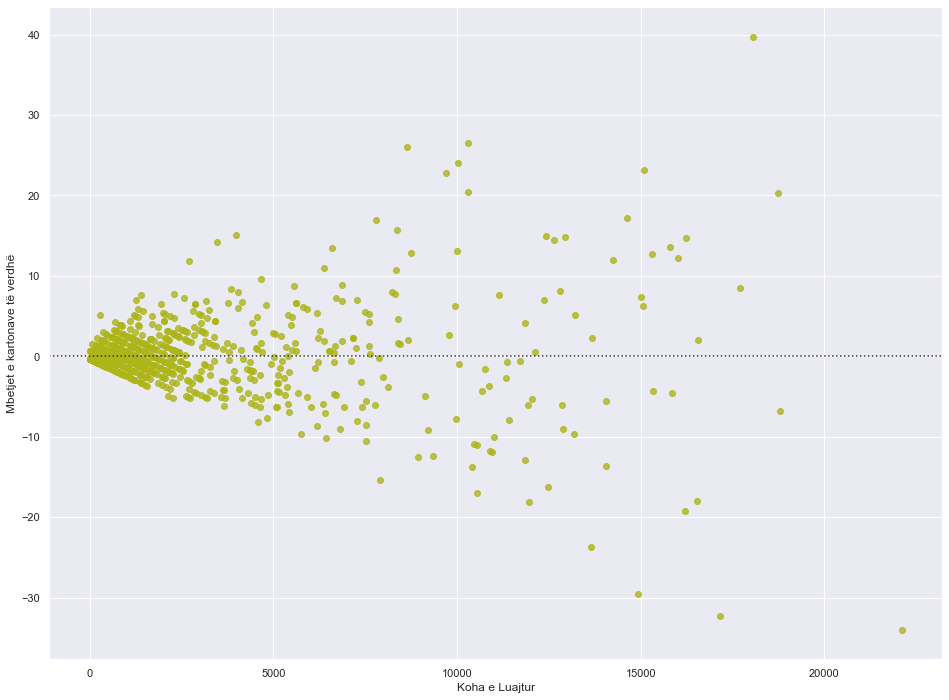

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)

yellow = sns.residplot(x="Minutes_played", y="Yellow_card", data=daf, color='#adb518')
yellow.set(xlabel='Koha e Luajtur', ylabel='Mbetjet e kartonave të verdhë')
fig = yellow.get_figure()

## Fig. 2.2.2 Grafiku i mbetjeve

## Modeli Ordinary Least Squares per kartonat e verdhe

In [83]:
mod = smf.quantreg('Yellow_card ~ Minutes_played', daf)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:            Yellow_card   Pseudo R-squared:               0.4969
Model:                       QuantReg   Bandwidth:                      0.7119
Method:                 Least Squares   Sparsity:                        3.008
Date:                Tue, 10 Nov 2020   No. Observations:                 1060
Time:                        08:49:28   Df Residuals:                     1058
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0521      0.056     -0.934      0.351      -0.162       0.057
Minutes_played     0.0022   1.34e-05    162.139      0.000       0.002       0.002

The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other nume

In [84]:
#q-quartile, lb-lower bound, up-upper bound
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Yellow_card ~ Minutes_played', daf).fit()
ols_ci = ols.conf_int().loc['Minutes_played'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Minutes_played'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q         a         b        lb        ub
0  0.05 -0.315282  0.000602  0.000580  0.000623
1  0.15 -0.248282  0.001099  0.001074  0.001123
2  0.25 -0.169318  0.001387  0.001361  0.001413
3  0.35 -0.141983  0.001722  0.001697  0.001748
4  0.45 -0.070671  0.002019  0.001992  0.002046
5  0.55 -0.039945  0.002350  0.002324  0.002376
6  0.65  0.030663  0.002654  0.002627  0.002682
7  0.75  0.385473  0.002979  0.002945  0.003013
8  0.85  0.773770  0.003259  0.003209  0.003310
9  0.95  1.414844  0.004033  0.003963  0.004104
{'a': 0.3012131850617394, 'b': 0.0021562105362934636, 'lb': 0.002074726122180672, 'ub': 0.002237694950406255}


Text(0, 0.5, 'Kartonat e verdhë')

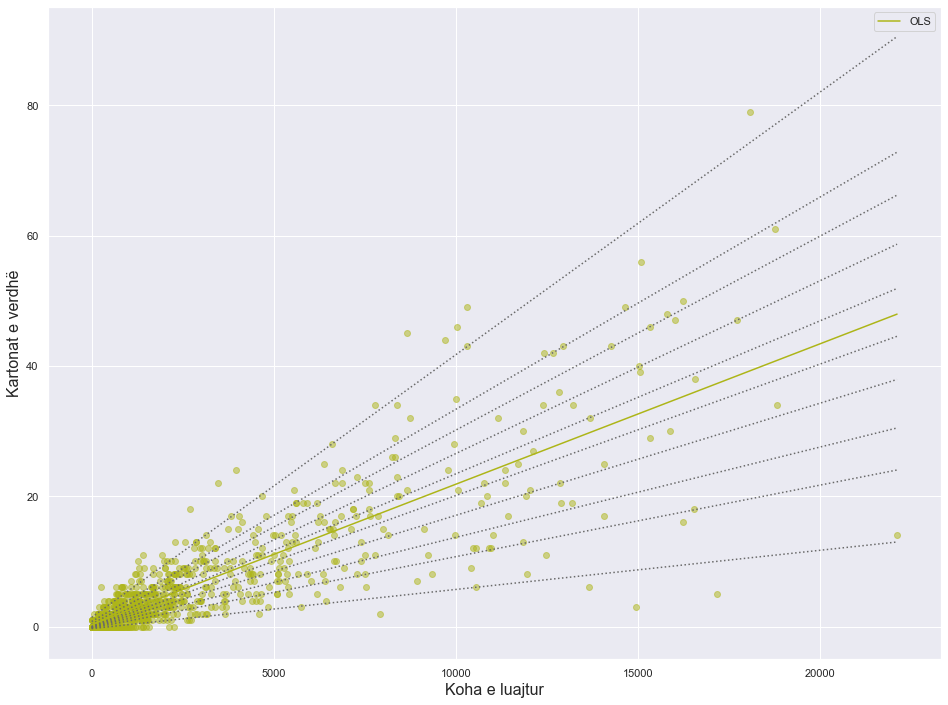

In [85]:
x = np.arange(daf.Minutes_played.min(), daf.Minutes_played.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(16, 12))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='#696969')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='#adb518', label='OLS')
ax.scatter(daf.Minutes_played, daf.Yellow_card, alpha=.5, color='#adb518')

legend = ax.legend()
ax.set_xlabel('Koha e luajtur', fontsize=16)
ax.set_ylabel('Kartonat e verdhë', fontsize=16)

## Fig. 2.2.3 Lidhja midis minutave të luajtura dhe kartonave të verdhë, bashkë me vijat e kuantileve

### Numri i ndeshjeve te luajtura ne Super Lige

In [86]:
res = []
for teams in goals1.home_team.unique():  
    matches_count = len(goals1.loc[(goals1['home_team'] == teams) | (goals1['away_team'] == teams)])
    home_count = goals1.loc[(goals1['home_team'] == teams),'ft_home'].sum()
    away_count = goals1.loc[(goals1['away_team'] == teams),'ft_away'].sum()
    total_goals = home_count + away_count
    res.append(pd.Series({
            "Ekipi": teams,
            "Numri i ndeshjeve te luajtura": matches_count,
            "Numri i golave ne shtepi": home_count,
            "Numri i golave jashte": away_count,
            "Numri i golave gjithsej": total_goals
        }))
df = pd.DataFrame(data=res)
df = df.sort_values(by='Numri i ndeshjeve te luajtura', ascending = False).reset_index(drop=True)
df

,Ekipi,Numri i ndeshjeve te luajtura,Numri i golave ne shtepi,Numri i golave jashte,Numri i golave gjithsej
0,Teuta,221,136,109,245
1,Flamurtari,220,139,90,229
2,Kukësi,220,200,137,337
3,Skënderbeu,218,214,126,340
4,Partizani,208,144,110,254
5,Vllaznia,199,107,79,186
6,Laçi,195,133,69,202
7,Tirana,184,139,92,231
8,Luftëtari,132,74,54,128
9,Bylis,84,49,34,83


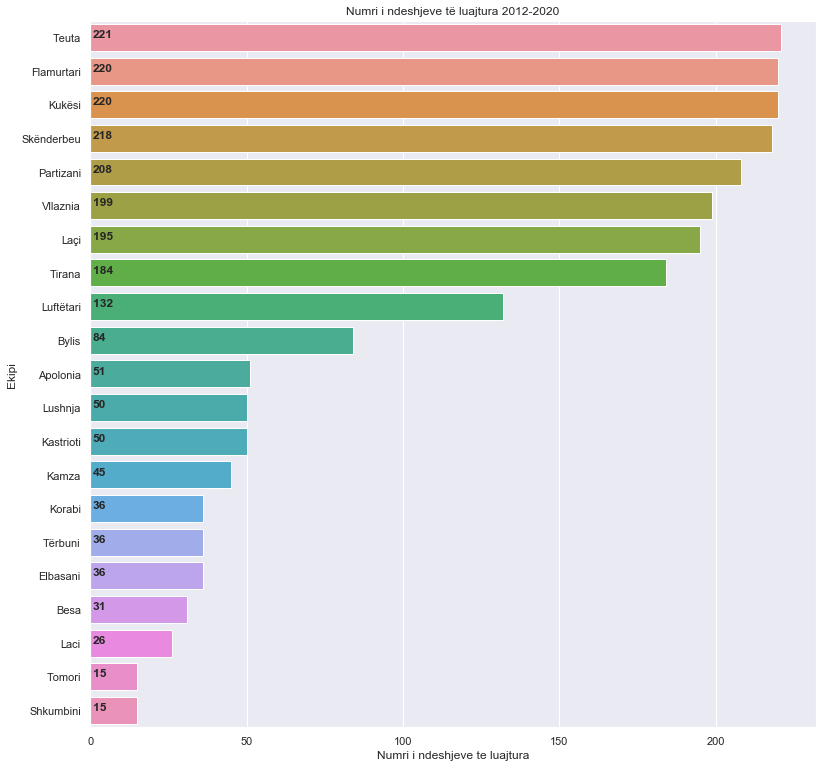

In [87]:
plt.figure(figsize=(13,13))
ax = sns.barplot(x=df["Numri i ndeshjeve te luajtura"], y=df["Ekipi"])
for i,j in enumerate(df["Numri i ndeshjeve te luajtura"].values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Numri i ndeshjeve të luajtura 2012-2020")
plt.show()

## Fig. 3.1 Numri i ndeshjeve të luajtura nga çdo skuader 2012-2020

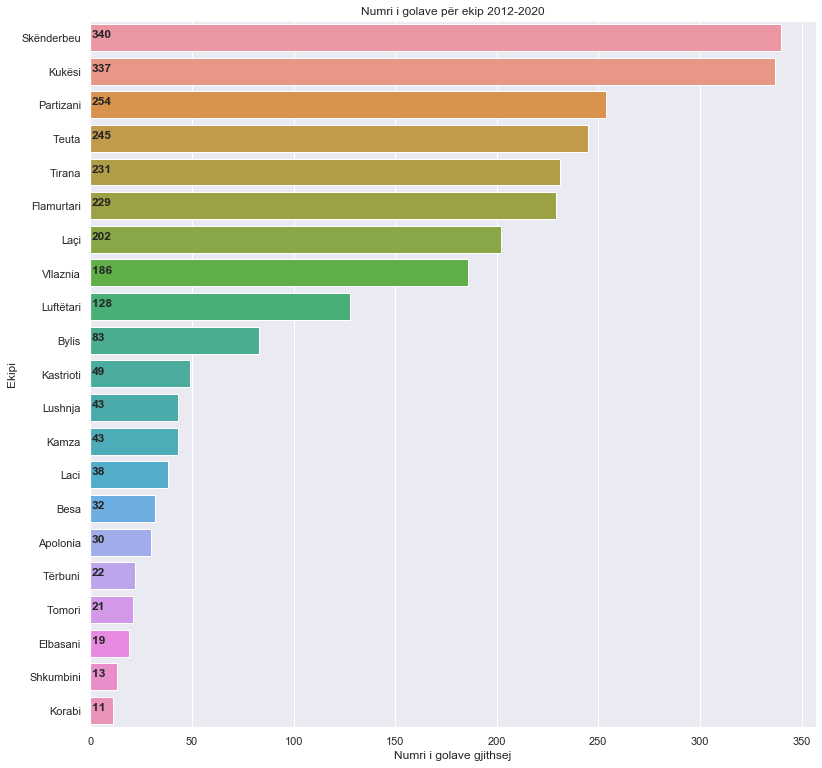

In [88]:
df2 = df.sort_values(by='Numri i golave gjithsej', ascending = False).reset_index(drop=True)
plt.figure(figsize=(13,13))
ax = sns.barplot(x=df2["Numri i golave gjithsej"], y=df2["Ekipi"])
for i,j in enumerate(df2["Numri i golave gjithsej"].values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Numri i golave për ekip 2012-2020")
plt.show()

## Fig. 3.2 Numri i golave nga çdo skuader 2012-2020

In [89]:
df1 = df.drop(df.columns[[1,4]], axis=1)
df1 = df1.sort_values(by='Numri i golave ne shtepi', ascending = False).reset_index(drop=True)
df1

,Ekipi,Numri i golave ne shtepi,Numri i golave jashte
0,Skënderbeu,214,126
1,Kukësi,200,137
2,Partizani,144,110
3,Tirana,139,92
4,Flamurtari,139,90
5,Teuta,136,109
6,Laçi,133,69
7,Vllaznia,107,79
8,Luftëtari,74,54
9,Bylis,49,34


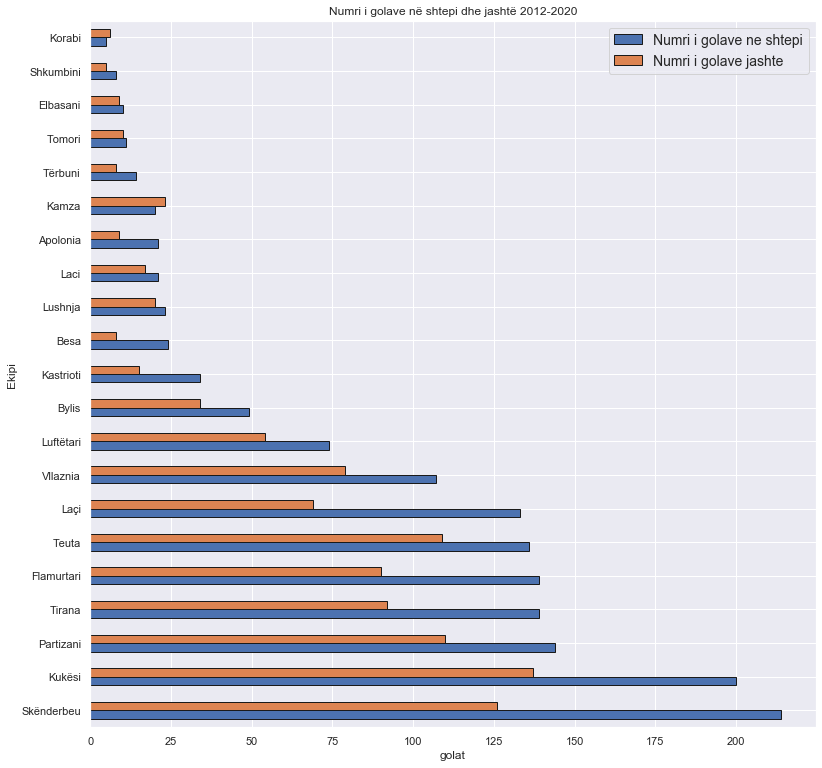

In [90]:
df1.plot(x='Ekipi',
    kind="barh",
    figsize = (13,13),
    edgecolor = "k",
    linewidth =1
    )
plt.title("Numri i golave në shtepi dhe jashtë 2012-2020")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("golat")
plt.show()

## Fig. 3.2 Numri i golave nga çdo skuadër, në shtëpi dhe jashtë

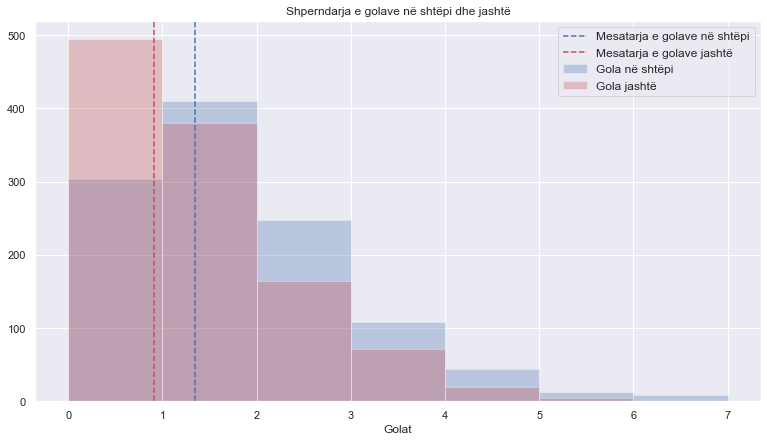

In [91]:
bins_h=np.arange(goals["ft_home"].min(), goals["ft_home"].max() + 1)
bins_a=np.arange(goals["ft_away"].min(), goals["ft_away"].max() + 1)

plt.figure(figsize=(13,7))
sns.distplot(goals["ft_home"],hist_kws=dict(alpha=0.3),
            color="b",label="Gola në shtëpi", kde=False, bins=bins_h)

sns.distplot(goals["ft_away"],hist_kws=dict(alpha=0.3),
            color="r",label="Gola jashtë", kde=False, bins=bins_h)

plt.axvline(goals["ft_home"].mean(), linestyle = "dashed",
            color="b",label="Mesatarja e golave në shtëpi")

plt.axvline(goals["ft_away"].mean(), linestyle = "dashed",
            color="r",label="Mesatarja e golave jashtë")

plt.legend(loc="best",prop = {"size" : 12})
plt.title("Shperndarja e golave në shtëpi dhe jashtë")
plt.xlabel("Golat")
plt.show()

## Fig. 3.4 Shpërdmarja e golave në shtëpi dhe jashtë

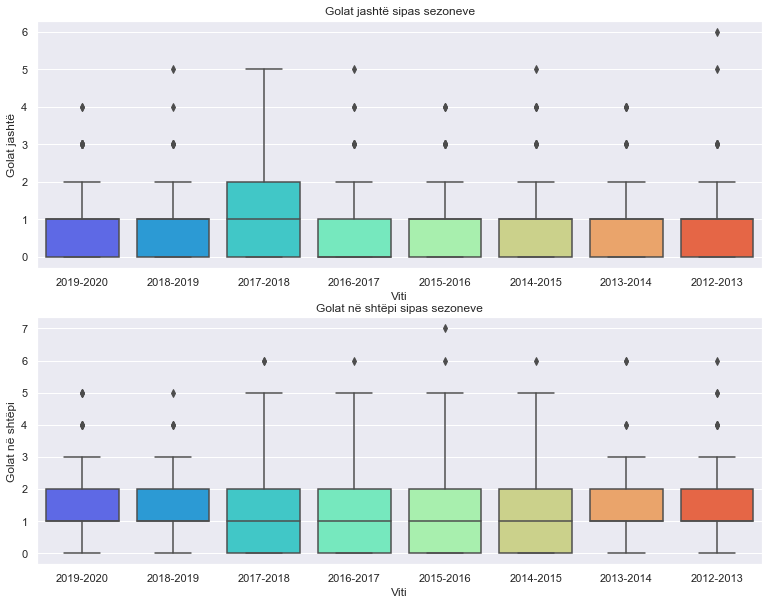

In [92]:
plt.figure(figsize=(13,10))
plt.subplot(211)
sns.boxplot(x = goals["year"],y = goals["ft_away"],palette="rainbow")
plt.title("Golat jashtë sipas sezoneve")
plt.ylabel("Golat jashtë")
plt.xlabel("Viti")

plt.subplot(212)

sns.boxplot(x = goals["year"],y = goals["ft_home"],palette="rainbow")
plt.title("Golat në shtëpi sipas sezoneve")
plt.ylabel("Golat në shtëpi")
plt.xlabel("Viti")
plt.show()

## Fig. 3.5 Shpërndarja e golave në shtëpi dhe jashtë sipas sezoneve

In [93]:
res4 = []
for Sezoni in entropy_means.iloc[:,0]:
    for teams in goals1.home_team.unique():  
        matches_count = len(goals.loc[(goals['home_team'] == teams) | (goals['away_team'] == teams) & (goals['year'] == Sezoni)])
        home_count = goals.loc[(goals['home_team'] == teams) & (goals['year'] == Sezoni),'ft_home'].sum()
        away_count = goals.loc[(goals1['away_team'] == teams) & (goals['year'] == Sezoni),'ft_away'].sum()
        total_goals = home_count + away_count
        res4.append(pd.Series({
                "Ekipi": teams,
                "Numri i ndeshjeve te luajtura": matches_count,
                "Numri i golave ne shtepi": home_count,
                "Numri i golave jashte": away_count,
                "Numri i golave gjithsej": total_goals,
                "Sezoni":Sezoni
            }))
df4 = pd.DataFrame(data=res4)

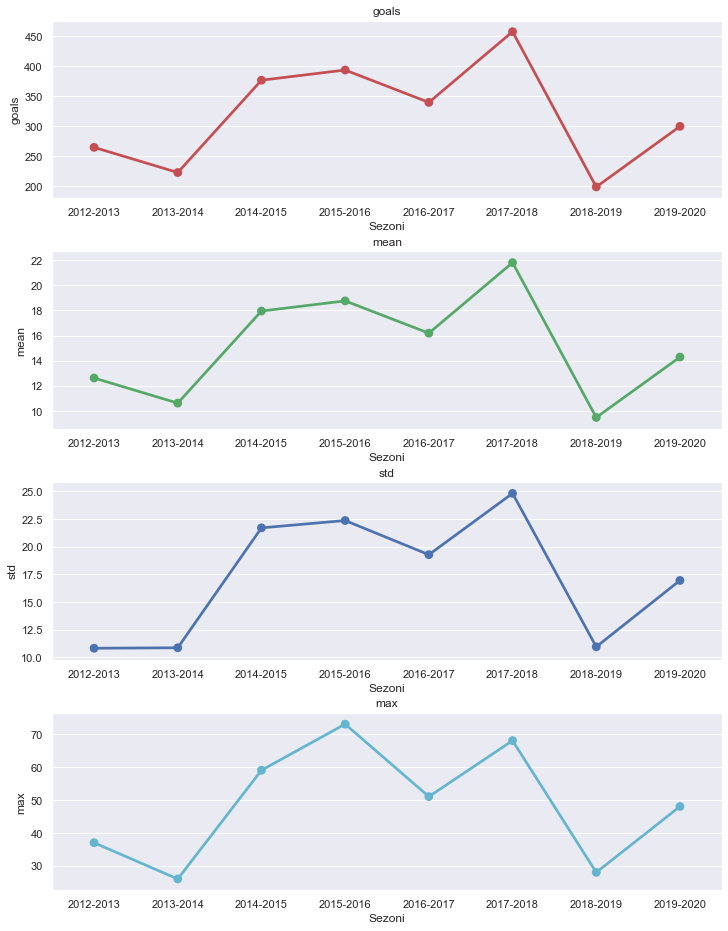

In [94]:
a = df4.groupby("Sezoni").agg({"Numri i golave gjithsej":"sum"})
m = df4.groupby("Sezoni").agg({"Numri i golave gjithsej":"mean"})
s = df4.groupby("Sezoni").agg({"Numri i golave gjithsej":"std"})
x = df4.groupby("Sezoni").agg({"Numri i golave gjithsej":"max"})
xx = a.merge(m,left_index=True,right_index=True,how="left")
yy = s.merge(x,left_index=True,right_index=True,how="left")
x_y = xx.merge(yy,left_index=True,right_index=True,how="left").reset_index()
x_y = x_y.rename(columns={'Numri i golave gjithsej_x_x':"goals", 'Numri i golave gjithsej_y_x':"mean",
                          'Numri i golave gjithsej_x_y':"std",'Numri i golave gjithsej_y_y':"max"})
import itertools
cols = [ 'goals', 'mean', 'std', 'max' ]
length = len(cols)
cs   = ["r","g","b","c"] 
plt.figure(figsize=(12,16))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(length,length/length,j+1)
    sns.pointplot(x_y["Sezoni"],x_y[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace =.3)

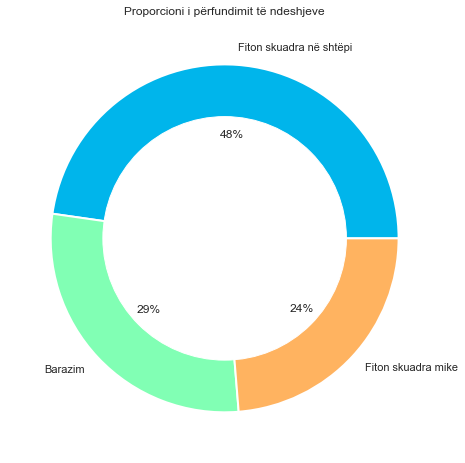

In [95]:
matches7 = matches
matches7.loc[matches7['winning_index'].astype(str) == "1", ['winning_index']] = 'Fiton skuadra në shtëpi'
matches7.loc[matches7['winning_index'].astype(str) == "x", ['winning_index']] = 'Barazim'
matches7.loc[matches7['winning_index'].astype(str) == "2", ['winning_index']] = 'Fiton skuadra mike'
plt.figure(figsize=(8,8))
matches7["winning_index"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("Proporcioni i përfundimit të ndeshjeve")
plt.ylabel("")
plt.show()

## Fig. 3.7 Raporti i përfundimit të ndeshjeve

In [96]:
df9 = players.groupby(["Name","Age"], as_index=False).sum()

Text(0.5, 0, 'Mosha')

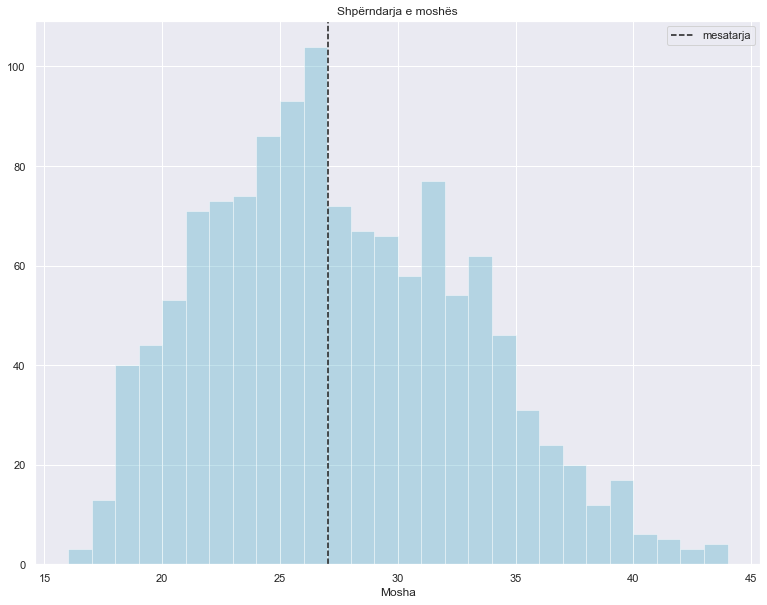

In [97]:
plt.figure(figsize=(13,10))
bins=np.arange(df9['Age'].min(), df9['Age'].max() + 1)
sns.distplot(df9['Age'],color='c', bins=bins, kde=False)
plt.axvline(df9['Age'].mean(),color = "k",linestyle = "dashed",label="mesatarja")
plt.legend(loc="best")
plt.title('Shpërndarja e moshës')
plt.xlabel("Mosha")

## Fig. 3.8 Histograma e shpërndarjes së moshës

In [98]:
play = df9["Name"].unique()
from wordcloud import WordCloud
import nltk
from PIL import Image
img = np.array(Image.open("z.jpg"))
wc = WordCloud(background_color="white",scale=2,mask=img,colormap="cool",max_words=100000).generate(" ".join(play))
fig = plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Mbiemrat e futbollistëve shqiptar më të përhapur")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'z.jpg'

## Fig. 3.9 Mbiemrat e futbollistëve shqiptar më të përhapur